<a href="https://colab.research.google.com/github/dhruvxsethi/CA6002-Project/blob/main/SMRT_DATA_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction & Objectives

1.1 Background

Singapore's public transport system is a critical component of urban mobility, serving millions of commuters daily through buses, MRT (Mass Rapid Transit), and LRT (Light Rail Transit). Understanding the relationship between fare adjustments and ridership patterns is essential for sustainable transport policy-making.

1.2 Objectives

This analysis aims to:

Analyze monthly ridership trends across Bus, MRT, and LRT from 2019-2024
Create standardized fare indices to track fare evolution over time
Examine the relationship between fare changes and ridership patterns
Assess the impact of COVID-19 pandemic on public transport usage
Provide data-driven insights for future fare policy decisions

1.3 Data Sources

Ridership Data: Monthly ridership data (2019-2024) for Bus, MRT, and LRT
Fare Data:
Bus fare review data (2019-2024)
MRT & LRT fare review data (2019-2024)
Adult Monthly Travel Pass prices (2019-2024)

1.4 Methodology Overview

Use Average fares across all distance bands to create fare indices
Focus on Adult, Card-based fares only (excluding student/senior/cash)
Create a 72-row monthly dataset (6 years × 12 months)
Control for COVID-19 impact in our analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Libraries imported successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ Libraries imported successfully!
Analysis Date: 2026-01-14 12:20:15


In [ ]:
# Load all data files
print("="*80)
print("LOADING ALL DATA FILES")
print("="*80)

# Load ridership data
try:
    ridership_df = pd.read_excel('ridership monthly(2019-2024).xlsx')
    print("\n✓ Ridership data loaded successfully!")
    print(f"  Shape: {ridership_df.shape}")
except Exception as e:
    print(f"\n✗ Error loading ridership data: {e}")

# Load bus fare data
try:
    bus_fare_df = pd.read_excel('fare_review(bus)(2019-2024).xlsx')
    print("\n✓ Bus fare data loaded successfully!")
    print(f"  Shape: {bus_fare_df.shape}")
except Exception as e:
    print(f"\n✗ Error loading bus fare data: {e}")

# Load train fare data
try:
    train_fare_df = pd.read_excel('fare_review(mrt&lrt)(2019-2024).xlsx')
    print("\n✓ Train fare data loaded successfully!")
    print(f"  Shape: {train_fare_df.shape}")
except Exception as e:
    print(f"\n✗ Error loading train fare data: {e}")

# Load monthly pass data
try:
    monthly_pass_df = pd.read_excel('Adult (Monthly Travel Pass2019-2024).xlsx')
    print("\n✓ Monthly pass data loaded successfully!")
    print(f"  Shape: {monthly_pass_df.shape}")
except Exception as e:
    print(f"\n✗ Error loading monthly pass data: {e}")

print("\n" + "="*80)

LOADING ALL DATA FILES

✓ Ridership data loaded successfully!
  Shape: (72, 4)

✓ Bus fare data loaded successfully!
  Shape: (39, 7)

✓ Train fare data loaded successfully!
  Shape: (39, 7)

✓ Monthly pass data loaded successfully!
  Shape: (6, 2)



In [ ]:
# Explore ridership data structure
print("="*80)
print("RIDERSHIP DATA STRUCTURE")
print("="*80)
print(f"\nColumns: {ridership_df.columns.tolist()}")
print(f"\nData types:\n{ridership_df.dtypes}")
print(f"\nMissing values:\n{ridership_df.isnull().sum()}")
print(f"\nFirst 10 rows:")
display(ridership_df.head(10))
print(f"\nLast 10 rows:")
display(ridership_df.tail(10))
print(f"\nBasic statistics:")
display(ridership_df.describe())

RIDERSHIP DATA STRUCTURE

Columns: ['MONTH', 'PUBLIC BUS', 'MRT', 'LRT']

Data types:
MONTH         datetime64[ns]
PUBLIC BUS             int64
MRT                    int64
LRT                    int64
dtype: object

Missing values:
MONTH         0
PUBLIC BUS    0
MRT           0
LRT           0
dtype: int64

First 10 rows:


,MONTH,PUBLIC BUS,MRT,LRT
0,2019-01-01,4250000,3462000,218000
1,2019-02-01,4010000,3248000,206000
2,2019-03-01,4111000,3383000,209000
3,2019-04-01,4189000,3400000,213000
4,2019-05-01,4199000,3359000,215000
5,2019-06-01,3840000,3246000,194000
6,2019-07-01,4300000,3551000,218000
7,2019-08-01,4163000,3419000,211000
8,2019-09-01,4117000,3444000,208000
9,2019-10-01,4170000,3431000,211000



Last 10 rows:


,MONTH,PUBLIC BUS,MRT,LRT
62,2024-03-01,3858000,3386000,207000
63,2024-04-01,3932000,3392000,215000
64,2024-05-01,3846000,3347000,211000
65,2024-06-01,3586000,3237000,195000
66,2024-07-01,3990000,3604000,220000
67,2024-08-01,3947000,3571000,217000
68,2024-09-01,3869000,3479000,212000
69,2024-10-01,3904000,3502000,215000
70,2024-11-01,3747000,3408000,205000
71,2024-12-01,3480000,3225000,187000



Basic statistics:


,MONTH,PUBLIC BUS,MRT,LRT
count,72,72.00,72.00,72.00
mean,2021-12-15 22:40:00,3504930.56,2817430.56,182152.78
min,2019-01-01 00:00:00,1187000.00,602000.00,47000.00
25%,2020-06-23 12:00:00,3201000.00,2363750.00,166750.00
50%,2021-12-16 12:00:00,3633500.00,3089500.00,193500.00
75%,2023-06-08 12:00:00,3880250.00,3360750.00,208250.00
max,2024-12-01 00:00:00,4300000.00,3604000.00,220000.00
std,NaN,592192.57,686279.04,35195.89


In [ ]:
# Explore bus fare data structure
print("="*80)
print("BUS FARE DATA STRUCTURE")
print("="*80)
print(f"\nColumns: {bus_fare_df.columns.tolist()}")
print(f"\nFirst 15 rows:")
display(bus_fare_df.head(15))
print(f"\nData shape: {bus_fare_df.shape}")

BUS FARE DATA STRUCTURE

Columns: ['Distance', 'Fare per ride(cents) -2019', 'Fare per ride(cents) -2020', 'Fare per ride(cents) -2021', 'Fare per ride(cents) -2022', 'Fare per ride(cents) -2023', 'Fare per ride(cents)-2024']

First 15 rows:


,Distance,Fare per ride(cents) -2019,Fare per ride(cents) -2020,Fare per ride(cents) -2021,Fare per ride(cents) -2022,Fare per ride(cents) -2023,Fare per ride(cents)-2024
0,Up to 3.2 km,83,92,92,95,99,109
1,3.3 km – 4.2 km,93,102,102,105,109,119
2,4.3 km – 5.2 km,103,112,112,115,119,130
3,5.3 km – 6.2 km,113,122,122,125,129,140
4,6.3 km – 7.2 km,122,131,131,134,138,149
5,7.3 km – 8.2 km,129,138,138,141,145,156
6,8.3 km – 9.2 km,135,144,144,147,152,163
7,9.3 km – 10.2 km,139,148,148,151,156,167
8,10.3 km – 11.2 km,143,152,152,155,160,171
9,11.3 km – 12.2 km,147,156,156,159,164,175



Data shape: (39, 7)


In [ ]:
# Explore train fare data structure
print("="*80)
print("TRAIN (MRT & LRT) FARE DATA STRUCTURE")
print("="*80)
print(f"\nColumns: {train_fare_df.columns.tolist()}")
print(f"\nFirst 15 rows:")
display(train_fare_df.head(15))
print(f"\nData shape: {train_fare_df.shape}")

TRAIN (MRT & LRT) FARE DATA STRUCTURE

Columns: ['Distance', 'Fare per ride(cents) -2019', 'Fare per ride(cents) -2020', 'Fare per ride(cents) -2021', 'Fare per ride(cents) -2022', 'Fare per ride(cents) -2023', 'Fare per ride(cents)-2024']

First 15 rows:


,Distance,Fare per ride(cents) -2019,Fare per ride(cents) -2020,Fare per ride(cents) -2021,Fare per ride(cents) -2022,Fare per ride(cents) -2023,Fare per ride(cents)-2024
0,Up to 3.2 km,83,92,92,95,99,109
1,3.3 km – 4.2 km,93,102,102,105,109,119
2,4.3 km – 5.2 km,103,112,112,115,119,130
3,5.3 km – 6.2 km,113,122,122,125,129,140
4,6.3 km – 7.2 km,122,131,131,134,138,149
5,7.3 km – 8.2 km,129,138,138,141,145,156
6,8.3 km – 9.2 km,135,144,144,147,152,163
7,9.3 km – 10.2 km,139,148,148,151,156,167
8,10.3 km – 11.2 km,143,152,152,155,160,171
9,11.3 km – 12.2 km,147,156,156,159,164,175



Data shape: (39, 7)


In [ ]:
# Explore monthly pass data structure
print("="*80)
print("ADULT MONTHLY TRAVEL PASS DATA STRUCTURE")
print("="*80)
print(f"\nColumns: {monthly_pass_df.columns.tolist()}")
print(f"\nAll rows:")
display(monthly_pass_df)
print(f"\nData shape: {monthly_pass_df.shape}")

ADULT MONTHLY TRAVEL PASS DATA STRUCTURE

Columns: ['Year', 'Price']

All rows:


,Year,Price
0,2019,120
1,2020,128
2,2021,128
3,2022,128
4,2023,128
5,2024,128



Data shape: (6, 2)


In [ ]:
# Create Bus Fare Index ( Average across all distance bands)
print("="*80)
print("CREATING BUS FARE INDEX")
print("="*80)

# Check available columns
print("\nAvailable columns in bus_fare_df:")
print(bus_fare_df.columns.tolist())
print()

bus_fare_indices = {}

# Your data has fares in CENTS - need to convert to DOLLARS
# Average each year column across ALL distance bands (Option A)
for year in range(2019, 2025):  #  [2019, 2020, 2021, 2022, 2023, 2024]
    # Try to find the column that contains the year
    col_name = None

    # Try different column name formats
    possible_names = [
        f'Fare per ride(cents) -{year}',  # Format: 'Fare per ride(cents) -2019'
        f'Fare per ride(cents)-{year}',   # Format: 'Fare per ride(cents)-2024'
        str(year),                         # Simple year string
        year                               # Year as integer
    ]

    for possible_name in possible_names:
        if possible_name in bus_fare_df.columns:
            col_name = possible_name
            break

    if col_name is not None:
        # Average across ALL rows (all distance bands) and convert cents to dollars
        fare_in_cents = bus_fare_df[col_name].mean()
        bus_fare_indices[year] = fare_in_cents / 100  # Convert to dollars
        print(f"{year}: {fare_in_cents:.1f} cents = ${bus_fare_indices[year]:.3f}")
    else:
        print(f"⚠️  Column for year {year} not found, skipping...")

print(f"\n✓ Bus Fare Indices created for years: {list(bus_fare_indices.keys())}")
print(f"✓ Index values (in dollars): {bus_fare_indices}")
print("="*80)

CREATING BUS FARE INDEX

Available columns in bus_fare_df:
['Distance', 'Fare per ride(cents) -2019', 'Fare per ride(cents) -2020', 'Fare per ride(cents) -2021', 'Fare per ride(cents) -2022', 'Fare per ride(cents) -2023', 'Fare per ride(cents)-2024']

2019: 170.9 cents = $1.709
2020: 179.9 cents = $1.799
2021: 179.9 cents = $1.799
2022: 183.6 cents = $1.836
2023: 188.5 cents = $1.885
2024: 199.4 cents = $1.994

✓ Bus Fare Indices created for years: [2019, 2020, 2021, 2022, 2023, 2024]
✓ Index values (in dollars): {2019: 1.7092307692307693, 2020: 1.7992307692307694, 2021: 1.7992307692307694, 2022: 1.836153846153846, 2023: 1.8846153846153846, 2024: 1.994102564102564}


In [ ]:
# Create Train Fare Index (Average across all distance bands)
print("="*80)
print("CREATING TRAIN (MRT & LRT) FARE INDEX")
print("="*80)

# Check available columns
print("\nAvailable columns in train_fare_df:")
print(train_fare_df.columns.tolist())
print()

train_fare_indices = {}

# Your data has fares in CENTS - need to convert to DOLLARS
# Average each year column across ALL distance bands
for year in range(2019, 2025):  # [2019, 2020, 2021, 2022, 2023, 2024]
    # Try to find the column that contains the year
    col_name = None

    # Try different column name formats
    possible_names = [
        f'Fare per ride(cents) -{year}',  # Format: 'Fare per ride(cents) -2019'
        f'Fare per ride(cents)-{year}',   # Format: 'Fare per ride(cents)-2024'
        str(year),                         # Simple year string
        year                               # Year as integer
    ]

    for possible_name in possible_names:
        if possible_name in train_fare_df.columns:
            col_name = possible_name
            break

    if col_name is not None:
        # Average across ALL rows (all distance bands) and convert cents to dollars
        fare_in_cents = train_fare_df[col_name].mean()
        train_fare_indices[year] = fare_in_cents / 100  # Convert to dollars
        print(f"{year}: {fare_in_cents:.1f} cents = ${train_fare_indices[year]:.3f}")
    else:
        print(f"⚠️  Column for year {year} not found, skipping...")

print(f"\n✓ Train Fare Indices created for years: {list(train_fare_indices.keys())}")
print(f"✓ Index values (in dollars): {train_fare_indices}")
print("="*80)

CREATING TRAIN (MRT & LRT) FARE INDEX

Available columns in train_fare_df:
['Distance', 'Fare per ride(cents) -2019', 'Fare per ride(cents) -2020', 'Fare per ride(cents) -2021', 'Fare per ride(cents) -2022', 'Fare per ride(cents) -2023', 'Fare per ride(cents)-2024']

2019: 170.9 cents = $1.709
2020: 179.9 cents = $1.799
2021: 179.9 cents = $1.799
2022: 183.6 cents = $1.836
2023: 188.5 cents = $1.885
2024: 199.4 cents = $1.994

✓ Train Fare Indices created for years: [2019, 2020, 2021, 2022, 2023, 2024]
✓ Index values (in dollars): {2019: 1.7092307692307693, 2020: 1.7992307692307694, 2021: 1.7992307692307694, 2022: 1.836153846153846, 2023: 1.8846153846153846, 2024: 1.994102564102564}


In [ ]:
# Extract Monthly Pass Prices
print("="*80)
print("EXTRACTING ADULT MONTHLY TRAVEL PASS PRICES")
print("="*80)

# Check the structure
print("\nMonthly Pass DataFrame:")
display(monthly_pass_df)
print()

monthly_pass_prices = {}

# Your data has 'Year' and 'Price' columns (already in dollars)
if 'Year' in monthly_pass_df.columns and 'Price' in monthly_pass_df.columns:
    for idx, row in monthly_pass_df.iterrows():
        year = int(row['Year'])
        price = float(row['Price'])
        monthly_pass_prices[year] = price
        print(f"{year}: ${price:.2f}")

# Alternative: If years are column names (wide format)
elif '2019' in monthly_pass_df.columns or 2019 in monthly_pass_df.columns:
    for year in range(2019, 2025):
        if str(year) in monthly_pass_df.columns:
            monthly_pass_prices[year] = float(monthly_pass_df[str(year)].values[0])
        elif year in monthly_pass_df.columns:
            monthly_pass_prices[year] = float(monthly_pass_df[year].values[0])

    for year, price in monthly_pass_prices.items():
        print(f"{year}: ${price:.2f}")

else:
    print("⚠️  Could not auto-detect structure.")
    print("Please check your column names and adjust the code above.")

print(f"\n✓ Monthly Pass Prices extracted for years: {list(monthly_pass_prices.keys())}")
print(f"✓ Values (in dollars): {monthly_pass_prices}")
print("="*80)

EXTRACTING ADULT MONTHLY TRAVEL PASS PRICES

Monthly Pass DataFrame:


,Year,Price
0,2019,120
1,2020,128
2,2021,128
3,2022,128
4,2023,128
5,2024,128



2019: $120.00
2020: $128.00
2021: $128.00
2022: $128.00
2023: $128.00
2024: $128.00

✓ Monthly Pass Prices extracted for years: [2019, 2020, 2021, 2022, 2023, 2024]
✓ Values (in dollars): {2019: 120.0, 2020: 128.0, 2021: 128.0, 2022: 128.0, 2023: 128.0, 2024: 128.0}


In [ ]:
# Clean Ridership Data
print("="*80)
print("CLEANING RIDERSHIP DATA")
print("="*80)

print("\nOriginal columns:", ridership_df.columns.tolist())

ridership_clean = ridership_df.copy()

# Your ridership data has columns: MONTH, PUBLIC BUS, MRT, LRT
# Convert MONTH column to datetime
ridership_clean['date'] = pd.to_datetime(ridership_clean['MONTH'], format='%b-%y')

# Extract year and month
ridership_clean['year'] = ridership_clean['date'].dt.year
ridership_clean['month'] = ridership_clean['date'].dt.month

# Rename columns for consistency
# PUBLIC BUS = Bus ridership (in your data)
ridership_clean = ridership_clean.rename(columns={
    'PUBLIC BUS': 'bus_ridership',
    'MRT': 'mrt_ridership',
    'LRT': 'lrt_ridership'
})

# Convert ridership from absolute numbers to millions for easier interpretation
ridership_clean['bus_ridership'] = ridership_clean['bus_ridership'] / 1_000_000
ridership_clean['mrt_ridership'] = ridership_clean['mrt_ridership'] / 1_000_000
ridership_clean['lrt_ridership'] = ridership_clean['lrt_ridership'] / 1_000_000

# Calculate total ridership (in millions)
ridership_clean['total_ridership'] = (
    ridership_clean['bus_ridership'] +
    ridership_clean['mrt_ridership'] +
    ridership_clean['lrt_ridership']
)

print(f"\n✓ Ridership data cleaned!")
print(f"✓ Shape: {ridership_clean.shape}")
print(f"✓ Date range: {ridership_clean['date'].min()} to {ridership_clean['date'].max()}")
print(f"\nFirst 10 rows:")
display(ridership_clean[['date', 'year', 'month', 'bus_ridership', 'mrt_ridership', 'lrt_ridership', 'total_ridership']].head(10))
print(f"\nLast 10 rows:")
display(ridership_clean[['date', 'year', 'month', 'bus_ridership', 'mrt_ridership', 'lrt_ridership', 'total_ridership']].tail(10))
print("="*80)

CLEANING RIDERSHIP DATA

Original columns: ['MONTH', 'PUBLIC BUS', 'MRT', 'LRT']

✓ Ridership data cleaned!
✓ Shape: (72, 8)
✓ Date range: 2019-01-01 00:00:00 to 2024-12-01 00:00:00

First 10 rows:


,date,year,month,bus_ridership,mrt_ridership,lrt_ridership,total_ridership
0,2019-01-01,2019,1,4.25,3.46,0.22,7.93
1,2019-02-01,2019,2,4.01,3.25,0.21,7.46
2,2019-03-01,2019,3,4.11,3.38,0.21,7.70
3,2019-04-01,2019,4,4.19,3.40,0.21,7.80
4,2019-05-01,2019,5,4.20,3.36,0.21,7.77
5,2019-06-01,2019,6,3.84,3.25,0.19,7.28
6,2019-07-01,2019,7,4.30,3.55,0.22,8.07
7,2019-08-01,2019,8,4.16,3.42,0.21,7.79
8,2019-09-01,2019,9,4.12,3.44,0.21,7.77
9,2019-10-01,2019,10,4.17,3.43,0.21,7.81



Last 10 rows:


,date,year,month,bus_ridership,mrt_ridership,lrt_ridership,total_ridership
62,2024-03-01,2024,3,3.86,3.39,0.21,7.45
63,2024-04-01,2024,4,3.93,3.39,0.21,7.54
64,2024-05-01,2024,5,3.85,3.35,0.21,7.40
65,2024-06-01,2024,6,3.59,3.24,0.20,7.02
66,2024-07-01,2024,7,3.99,3.60,0.22,7.81
67,2024-08-01,2024,8,3.95,3.57,0.22,7.74
68,2024-09-01,2024,9,3.87,3.48,0.21,7.56
69,2024-10-01,2024,10,3.90,3.50,0.21,7.62
70,2024-11-01,2024,11,3.75,3.41,0.20,7.36
71,2024-12-01,2024,12,3.48,3.23,0.19,6.89


In [ ]:
# Create Master Dataset (72 rows: 6 years × 12 months)
print("="*80)
print("CREATING MASTER DATASET")
print("="*80)

# Combine all data sources
master_df = ridership_clean.copy()

# Add fare indices (maps each month to its year's fare index)
master_df['TrainFareIndex'] = master_df['year'].map(train_fare_indices)
master_df['BusFareIndex'] = master_df['year'].map(bus_fare_indices)
master_df['MonthlyPassPrice'] = master_df['year'].map(monthly_pass_prices)

# Add COVID dummy variable (Mar 2020 - Dec 2021 = 1, else = 0)
master_df['covid_dummy'] = 0
covid_mask = ((master_df['year'] == 2020) & (master_df['month'] >= 3)) | (master_df['year'] == 2021)
master_df.loc[covid_mask, 'covid_dummy'] = 1

print(f"\n✓ COVID dummy added: {master_df['covid_dummy'].sum()} months marked as COVID period")

# Sort by date
master_df = master_df.sort_values('date').reset_index(drop=True)

# Add 12-month lag variable (for regression/ML models)
master_df['lag12_total'] = master_df['total_ridership'].shift(12)

# Add quarter/season
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

master_df['quarter'] = master_df['month'].apply(get_quarter)

# VERIFY: Must have exactly 72 rows (6 years × 12 months)
print(f"\n{'='*80}")
print("VERIFICATION CHECKS")
print(f"{'='*80}")
print(f"✓ Master dataset shape: {master_df.shape}")

if master_df.shape[0] != 72:
    print(f"⚠️  WARNING: Expected 72 rows, got {master_df.shape[0]}!")
else:
    print(f"✓ Row count correct: 72 rows (6 years × 12 months)")

# Check monthly coverage
monthly_coverage = master_df.groupby('year')['month'].nunique()
print(f"\n✓ Monthly coverage by year:")
print(monthly_coverage)

if not all(monthly_coverage == 12):
    print("⚠️  WARNING: Some years don't have all 12 months!")
else:
    print("✓ All years have 12 months")

# Check for missing values (lag12_total will have 12 NaN for first year - that's expected)
print(f"\n✓ Missing values check:")
missing = master_df.isnull().sum()
print(missing[missing > 0])
print("(Note: lag12_total has 12 NaN for first year - this is expected)")

# Preview
print(f"\n{'='*80}")
print("MASTER DATASET PREVIEW")
print(f"{'='*80}")
print(f"\nFirst 10 rows:")
display(master_df[['date', 'year', 'month', 'total_ridership', 'TrainFareIndex', 'BusFareIndex', 'MonthlyPassPrice', 'covid_dummy']].head(10))

print(f"\nLast 10 rows:")
display(master_df[['date', 'year', 'month', 'total_ridership', 'TrainFareIndex', 'BusFareIndex', 'MonthlyPassPrice', 'covid_dummy']].tail(10))

# Save master dataset
master_df.to_csv('master_dataset.csv', index=False)
print(f"\n✓ Master dataset saved to 'master_dataset.csv'")

# Print summary
print(f"\n{'='*80}")
print("MASTER DATASET SUMMARY")
print(f"{'='*80}")
print(f"Total rows: {len(master_df)}")
print(f"Date range: {master_df['date'].min().strftime('%b-%Y')} to {master_df['date'].max().strftime('%b-%Y')}")
print(f"Total columns: {len(master_df.columns)}")
print(f"\nKey columns:")
print(f"  • Ridership: bus_ridership, mrt_ridership, lrt_ridership, total_ridership (in millions)")
print(f"  • Fare Indices: TrainFareIndex, BusFareIndex (in dollars)")
print(f"  • Other: MonthlyPassPrice, covid_dummy, lag12_total, quarter")
print(f"\n✓ Master dataset is ready for analysis!")
print("="*80)

CREATING MASTER DATASET

✓ COVID dummy added: 22 months marked as COVID period

VERIFICATION CHECKS
✓ Master dataset shape: (72, 14)
✓ Row count correct: 72 rows (6 years × 12 months)

✓ Monthly coverage by year:
year
2019    12
2020    12
2021    12
2022    12
2023    12
2024    12
Name: month, dtype: int64
✓ All years have 12 months

✓ Missing values check:
lag12_total    12
dtype: int64
(Note: lag12_total has 12 NaN for first year - this is expected)

MASTER DATASET PREVIEW

First 10 rows:


,date,year,month,total_ridership,TrainFareIndex,BusFareIndex,MonthlyPassPrice,covid_dummy
0,2019-01-01,2019,1,7.93,1.71,1.71,120.00,0
1,2019-02-01,2019,2,7.46,1.71,1.71,120.00,0
2,2019-03-01,2019,3,7.70,1.71,1.71,120.00,0
3,2019-04-01,2019,4,7.80,1.71,1.71,120.00,0
4,2019-05-01,2019,5,7.77,1.71,1.71,120.00,0
5,2019-06-01,2019,6,7.28,1.71,1.71,120.00,0
6,2019-07-01,2019,7,8.07,1.71,1.71,120.00,0
7,2019-08-01,2019,8,7.79,1.71,1.71,120.00,0
8,2019-09-01,2019,9,7.77,1.71,1.71,120.00,0
9,2019-10-01,2019,10,7.81,1.71,1.71,120.00,0



Last 10 rows:


,date,year,month,total_ridership,TrainFareIndex,BusFareIndex,MonthlyPassPrice,covid_dummy
62,2024-03-01,2024,3,7.45,1.99,1.99,128.00,0
63,2024-04-01,2024,4,7.54,1.99,1.99,128.00,0
64,2024-05-01,2024,5,7.40,1.99,1.99,128.00,0
65,2024-06-01,2024,6,7.02,1.99,1.99,128.00,0
66,2024-07-01,2024,7,7.81,1.99,1.99,128.00,0
67,2024-08-01,2024,8,7.74,1.99,1.99,128.00,0
68,2024-09-01,2024,9,7.56,1.99,1.99,128.00,0
69,2024-10-01,2024,10,7.62,1.99,1.99,128.00,0
70,2024-11-01,2024,11,7.36,1.99,1.99,128.00,0
71,2024-12-01,2024,12,6.89,1.99,1.99,128.00,0



✓ Master dataset saved to 'master_dataset.csv'

MASTER DATASET SUMMARY
Total rows: 72
Date range: Jan-2019 to Dec-2024
Total columns: 14

Key columns:
  • Ridership: bus_ridership, mrt_ridership, lrt_ridership, total_ridership (in millions)
  • Fare Indices: TrainFareIndex, BusFareIndex (in dollars)
  • Other: MonthlyPassPrice, covid_dummy, lag12_total, quarter

✓ Master dataset is ready for analysis!


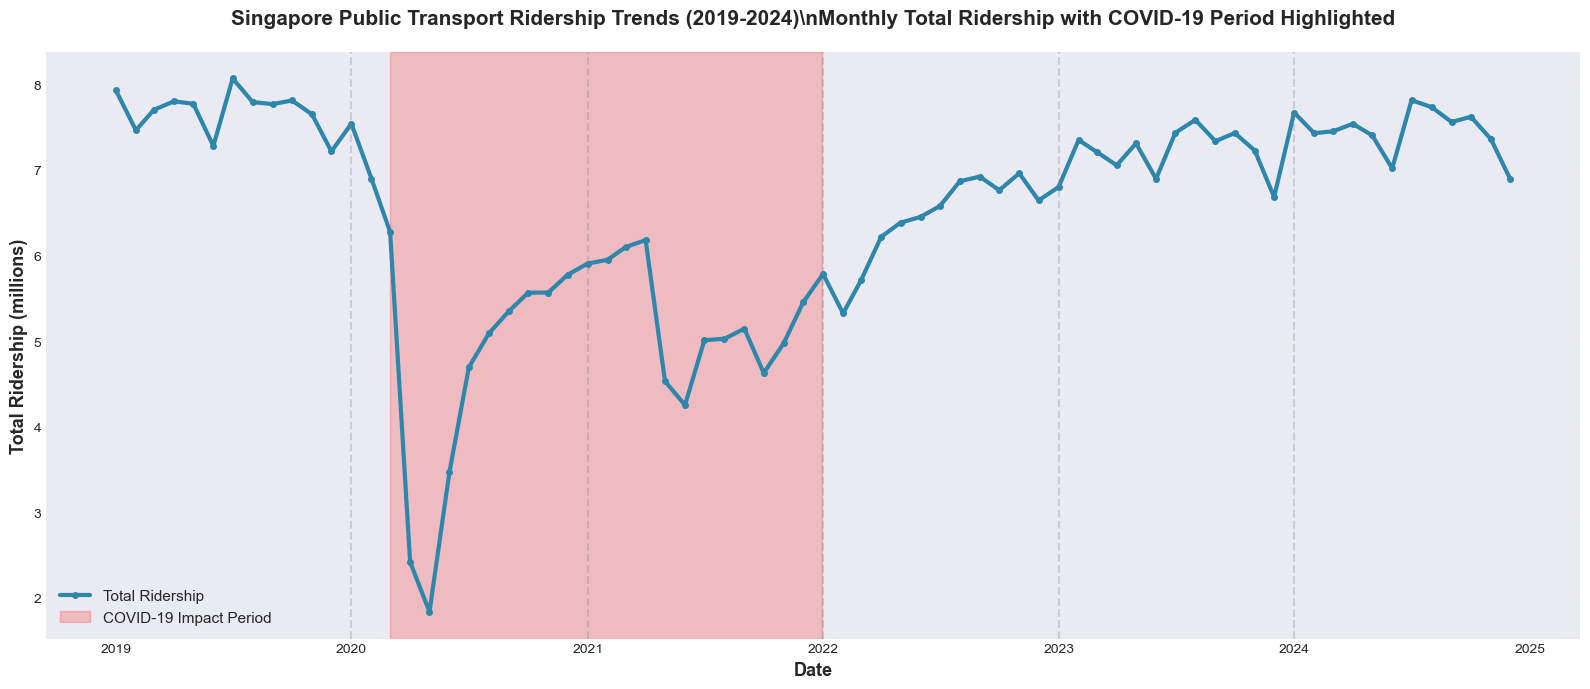

OVERALL RIDERSHIP STATISTICS
Peak Ridership: 8.07M
Peak Date: 2019-07
Lowest Ridership: 1.84M
Lowest Date: 2020-05
Average Ridership (2019-2024): 6.50M
Standard Deviation: 1.30M


In [ ]:
# Overall Ridership Trend with COVID Period Highlighted

fig, ax = plt.subplots(figsize=(16, 7))

# Plot total ridership
ax.plot(master_df['date'], master_df['total_ridership'],
        linewidth=3, color='#2E86AB', label='Total Ridership', marker='o', markersize=4)

# Shade COVID period (Mar 2020 - Dec 2021)
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2021-12-31')
ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='COVID-19 Impact Period')

# Add vertical line for fare changes (example)
for year in range(2020, 2025):
    ax.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--', alpha=0.3)

ax.set_xlabel('Date', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Ridership (millions)', fontsize=13, fontweight='bold')
ax.set_title('Singapore Public Transport Ridership Trends (2019-2024)\\nMonthly Total Ridership with COVID-19 Period Highlighted',
             fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.savefig('total_ridership_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# Print key statistics
print("="*80)
print("OVERALL RIDERSHIP STATISTICS")
print("="*80)
print(f"Peak Ridership: {master_df['total_ridership'].max():.2f}M")
print(f"Peak Date: {master_df.loc[master_df['total_ridership'].idxmax(), 'date'].strftime('%Y-%m')}")
print(f"Lowest Ridership: {master_df['total_ridership'].min():.2f}M")
print(f"Lowest Date: {master_df.loc[master_df['total_ridership'].idxmin(), 'date'].strftime('%Y-%m')}")
print(f"Average Ridership (2019-2024): {master_df['total_ridership'].mean():.2f}M")
print(f"Standard Deviation: {master_df['total_ridership'].std():.2f}M")

COVID-19 IMPACT ANALYSIS

Pre-COVID Average (2019): 7.69M
During COVID Average (Mar 2020-Dec 2021): 4.96M
Post-COVID Average (2022-2024): 7.01M

COVID Impact: -35.4% drop
Recovery Status (2022-2024 vs 2019): -8.8%
Recovery Rate: 75.2%


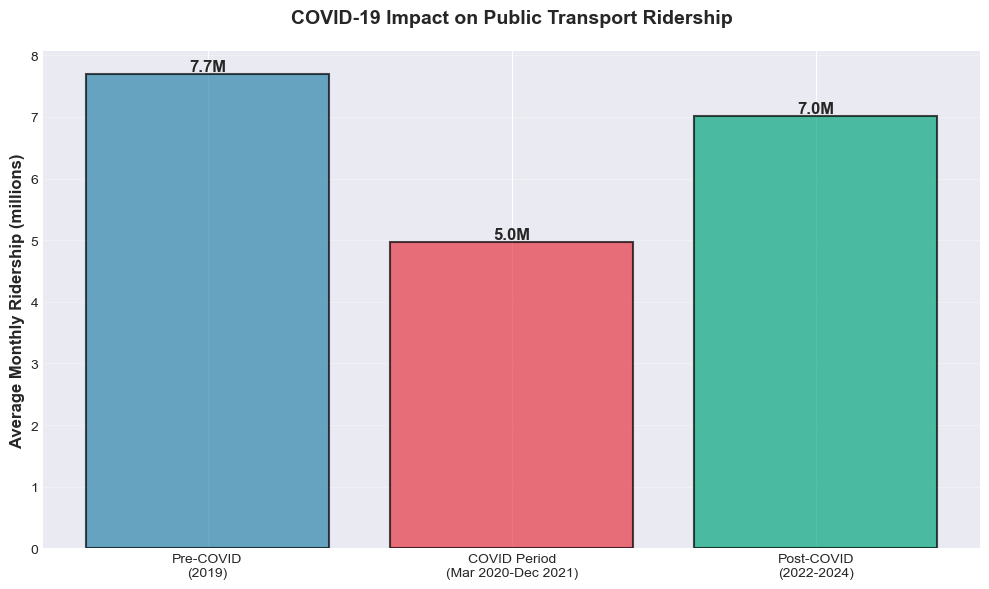

In [ ]:
# COVID Impact Quantification

# Define periods
pre_covid = master_df[master_df['year'] == 2019]['total_ridership']
covid_period = master_df[master_df['covid_dummy'] == 1]['total_ridership']
post_covid = master_df[master_df['year'].isin([2022, 2023, 2024])]['total_ridership']

print("="*80)
print("COVID-19 IMPACT ANALYSIS")
print("="*80)

print(f"\nPre-COVID Average (2019): {pre_covid.mean():.2f}M")
print(f"During COVID Average (Mar 2020-Dec 2021): {covid_period.mean():.2f}M")
print(f"Post-COVID Average (2022-2024): {post_covid.mean():.2f}M")

covid_drop_pct = ((covid_period.mean() - pre_covid.mean()) / pre_covid.mean() * 100)
recovery_pct = ((post_covid.mean() - pre_covid.mean()) / pre_covid.mean() * 100)
recovery_rate = ((post_covid.mean() - covid_period.mean()) / (pre_covid.mean() - covid_period.mean()) * 100)

print(f"\nCOVID Impact: {covid_drop_pct:.1f}% drop")
print(f"Recovery Status (2022-2024 vs 2019): {recovery_pct:+.1f}%")
print(f"Recovery Rate: {recovery_rate:.1f}%")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
periods = ['Pre-COVID\n(2019)', 'COVID Period\n(Mar 2020-Dec 2021)', 'Post-COVID\n(2022-2024)']
values = [pre_covid.mean(), covid_period.mean(), post_covid.mean()]
colors = ['#2E86AB', '#E63946', '#06A77D']

bars = ax.bar(periods, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}M', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Average Monthly Ridership (millions)', fontsize=12, fontweight='bold')
ax.set_title('COVID-19 Impact on Public Transport Ridership', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('covid_impact_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

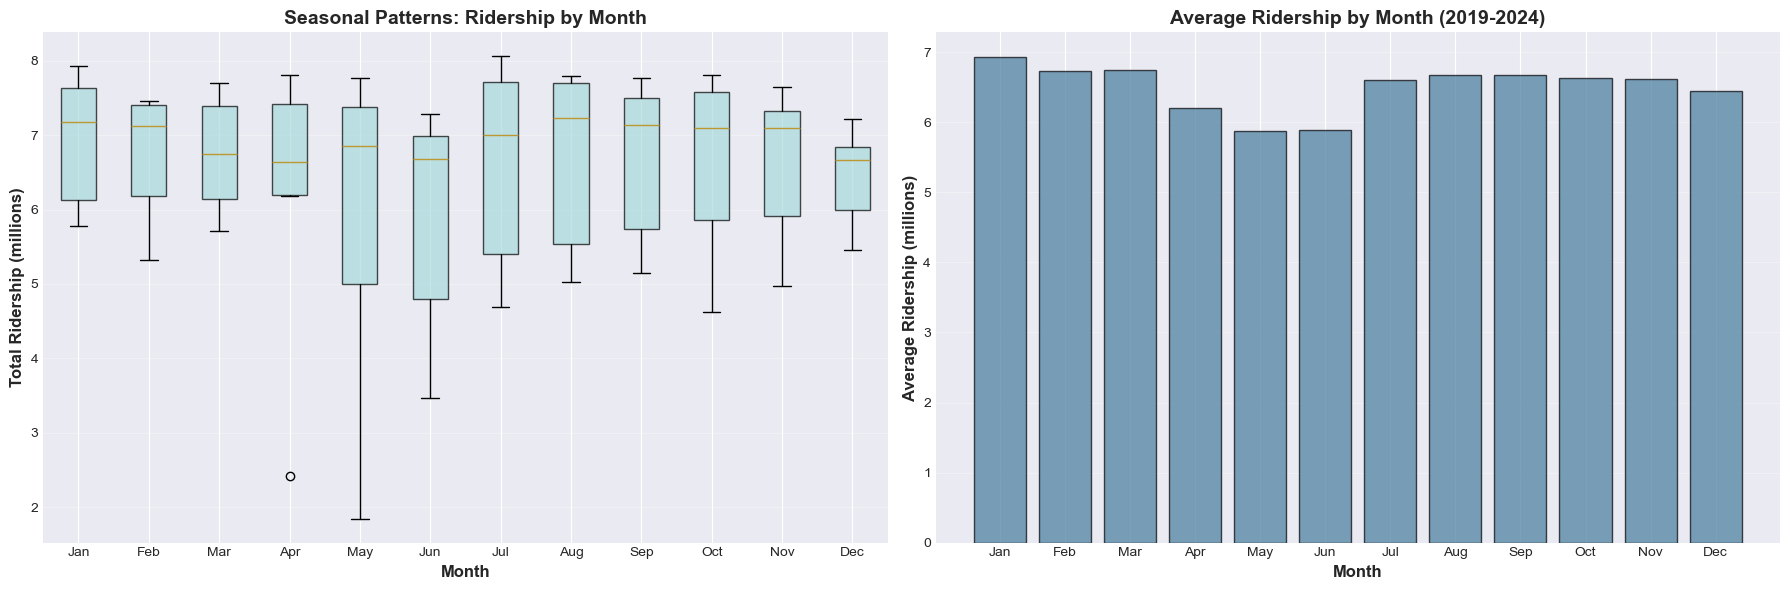

MONTHLY RIDERSHIP AVERAGES (Highest to Lowest)
Month  1 (Jan): 6.94M
Month  3 (Mar): 6.74M
Month  2 (Feb): 6.74M
Month  8 (Aug): 6.68M
Month  9 (Sep): 6.68M
Month 10 (Oct): 6.64M
Month 11 (Nov): 6.62M
Month  7 (Jul): 6.60M
Month 12 (Dec): 6.44M
Month  4 (Apr): 6.20M
Month  6 (Jun): 5.90M
Month  5 (May): 5.87M


In [ ]:
# ============================================================================
# Seasonal Patterns
# ============================================================================

# Seasonal Pattern Analysis

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Box plot by month
monthly_data = [master_df[master_df['month'] == m]['total_ridership'].values for m in range(1, 13)]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bp = ax1.boxplot(monthly_data, labels=month_names, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#A8DADC')
    patch.set_alpha(0.7)

ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Ridership (millions)', fontsize=12, fontweight='bold')
ax1.set_title('Seasonal Patterns: Ridership by Month', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Monthly averages
monthly_avg = master_df.groupby('month')['total_ridership'].mean()
ax2.bar(range(1, 13), monthly_avg.values, color='#457B9D', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Ridership (millions)', fontsize=12, fontweight='bold')
ax2.set_title('Average Ridership by Month (2019-2024)', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*80)
print("MONTHLY RIDERSHIP AVERAGES (Highest to Lowest)")
print("="*80)
monthly_avg_sorted = monthly_avg.sort_values(ascending=False)
for month, avg in monthly_avg_sorted.items():
    print(f"Month {month:2d} ({month_names[month-1]:3s}): {avg:.2f}M")


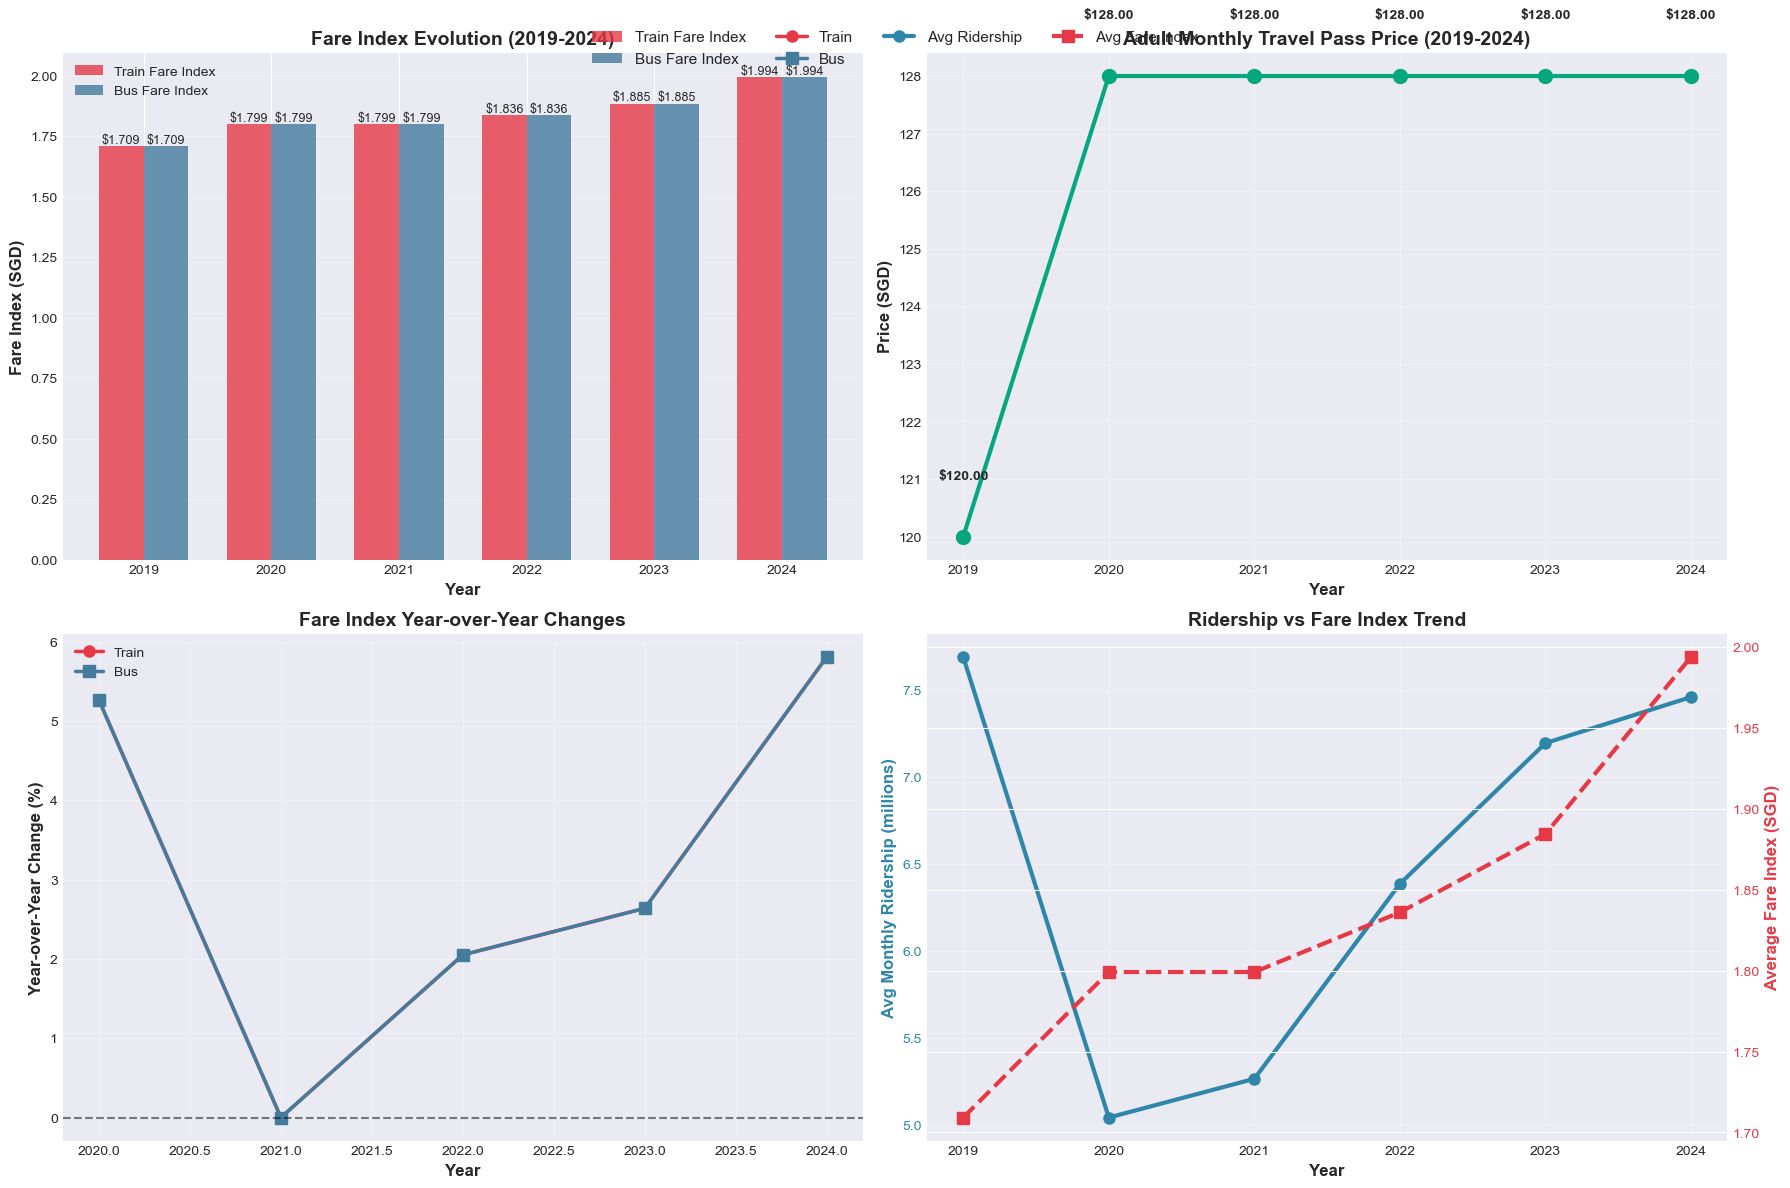

YEAR-OVER-YEAR FARE CHANGES
2020: Train +5.27%, Bus +5.27%
2021: Train +0.00%, Bus +0.00%
2022: Train +2.05%, Bus +2.05%
2023: Train +2.64%, Bus +2.64%
2024: Train +5.81%, Bus +5.81%


In [ ]:
# ============================================================================
# Fare Evolution Analysis
# ============================================================================

# Fare Evolution Analysis

# Get yearly aggregated data
yearly_data = master_df.groupby('year').agg({
    'TrainFareIndex': 'first',
    'BusFareIndex': 'first',
    'MonthlyPassPrice': 'first',
    'total_ridership': 'mean'
}).reset_index()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# 1. Fare indices over time
x = yearly_data['year']
width = 0.35

bars1 = ax1.bar(x - width/2, yearly_data['TrainFareIndex'], width, label='Train Fare Index', alpha=0.8, color='#E63946')
bars2 = ax1.bar(x + width/2, yearly_data['BusFareIndex'], width, label='Bus Fare Index', alpha=0.8, color='#457B9D')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.3f}', ha='center', va='bottom', fontsize=9)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Fare Index (SGD)', fontsize=12, fontweight='bold')
ax1.set_title('Fare Index Evolution (2019-2024)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Monthly pass price trend
ax2.plot(yearly_data['year'], yearly_data['MonthlyPassPrice'],
         marker='o', linewidth=3, markersize=10, color='#06A77D')
for x_val, y_val in zip(yearly_data['year'], yearly_data['MonthlyPassPrice']):
    ax2.text(x_val, y_val + 1, f'${y_val:.2f}', ha='center', fontsize=10, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Price (SGD)', fontsize=12, fontweight='bold')
ax2.set_title('Adult Monthly Travel Pass Price (2019-2024)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Year-over-year fare changes
yoy_train = yearly_data['TrainFareIndex'].pct_change() * 100
yoy_bus = yearly_data['BusFareIndex'].pct_change() * 100

x_yoy = yearly_data['year'][1:]  # Skip first year (no previous)
ax3.plot(x_yoy, yoy_train[1:], marker='o', linewidth=2.5, markersize=8, label='Train', color='#E63946')
ax3.plot(x_yoy, yoy_bus[1:], marker='s', linewidth=2.5, markersize=8, label='Bus', color='#457B9D')
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
ax3.set_ylabel('Year-over-Year Change (%)', fontsize=12, fontweight='bold')
ax3.set_title('Fare Index Year-over-Year Changes', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Dual-axis: Ridership vs Fare Index
ax4_2 = ax4.twinx()
ax4.plot(yearly_data['year'], yearly_data['total_ridership'], marker='o', linewidth=3,
         markersize=8, label='Avg Ridership', color='#2E86AB')
ax4_2.plot(yearly_data['year'], (yearly_data['TrainFareIndex'] + yearly_data['BusFareIndex'])/2,
           marker='s', linewidth=3, markersize=8, label='Avg Fare Index', color='#E63946', linestyle='--')

ax4.set_xlabel('Year', fontsize=12, fontweight='bold')
ax4.set_ylabel('Avg Monthly Ridership (millions)', fontsize=12, fontweight='bold', color='#2E86AB')
ax4_2.set_ylabel('Average Fare Index (SGD)', fontsize=12, fontweight='bold', color='#E63946')
ax4.set_title('Ridership vs Fare Index Trend', fontsize=14, fontweight='bold')
ax4.tick_params(axis='y', labelcolor='#2E86AB')
ax4_2.tick_params(axis='y', labelcolor='#E63946')
ax4.grid(True, alpha=0.3)

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=4, fontsize=11)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('fare_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print YoY changes
print("="*80)
print("YEAR-OVER-YEAR FARE CHANGES")
print("="*80)
for i in range(1, len(yearly_data)):
    year = int(yearly_data.iloc[i]['year'])
    train_change = yoy_train.iloc[i]
    bus_change = yoy_bus.iloc[i]
    print(f"{year}: Train {train_change:+.2f}%, Bus {bus_change:+.2f}%")
